<a href="https://colab.research.google.com/github/Orogen-Information-Systems/admissions/blob/main/admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Analysis of College Admissions Criteria

Author: Jim Morgan

Date: 11/09/2023

---

## Introduction

A brief exercise in using TensorFlow based on a college admissions dataset originating from Codecademy. This exercise pre-processes data, constructs a sequential model with input, hidden, and output layers, and finally evaluates the resulting predictions.

In [ ]:
# Import Libraries and Tools
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [ ]:
drive.mount('/content/drive')
dataset = pd.read_csv('drive/MyDrive/Colab Notebooks/Admissions Project/data/admissions.csv')

dataset.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# Prepare the feature and label data
features = dataset.iloc[:, :-1]
features.drop(['Serial No.'], axis=1, inplace=True)

labels = dataset.iloc[:, -1]

features_train, features_test, labels_train, labels_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=42)

In [ ]:
# Normalize the data
ct = ColumnTransformer(
    [('only_numeric', StandardScaler(), features.columns)],
    remainder='passthrough'
)

# Fit the feature data to the transformer
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

In [ ]:
# Create the model and layer objects
admissions_model = Sequential()
input = layers.InputLayer(input_shape=(features.shape[1], ))
hidden = layers.Dense(64, activation="relu")
output = layers.Dense(1)

# Add layers to the model
admissions_model.add(input)
admissions_model.add(hidden)
admissions_model.add(output)

# Display output
print(admissions_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                512       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Initialize Optimizer and Compile Model
sgd = SGD(learning_rate=0.1)

admissions_model.compile(
    loss='mse',
    metrics=['mae'],
    optimizer=sgd
)

In [ ]:
history = admissions_model.fit(
    features_train_scaled,
    labels_train,
    epochs=40,
    batch_size=10,
    verbose=1
)

Epoch 1/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0043 - mae: 0.0499
Epoch 2/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0499
Epoch 3/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0042 - mae: 0.0483
Epoch 4/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0481
Epoch 5/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0466
Epoch 6/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0468
Epoch 7/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0467
Epoch 8/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0039 - mae: 0.0467
Epoch 9/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0434
Epoch 10/40
40/40 [==============================] - 0s 2ms/step - loss: 0.0034 - mae: 0.0436
Epoch 11/40
40/40 [==============================] - 0s 2ms/step - lo

In [ ]:
res_mse, res_mae = admissions_model.evaluate(
    features_test_scaled,
    labels_test,
    verbose=0
)
print("Final loss:", res_mse)
print("Final metric:", res_mae)

Final loss: 0.004193304572254419
Final metric: 0.046978045254945755


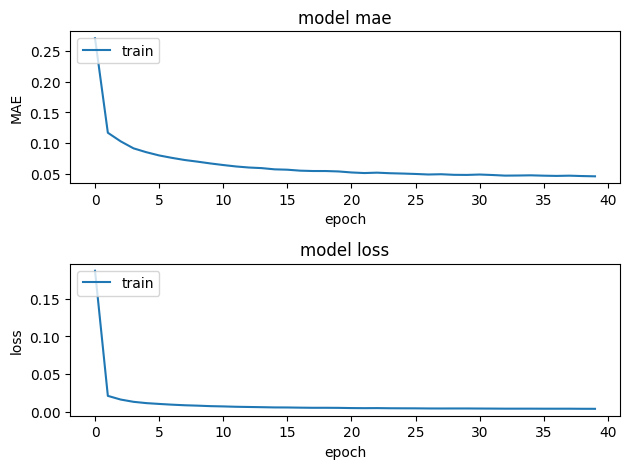

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

# used to keep plots from overlapping each other
fig.tight_layout()

In [ ]:
# Determine R^2 Value
predicted_values = admissions_model.predict(features_test_scaled)
print(r2_score(labels_test, predicted_values))

4/4 [==============================] - 0s 3ms/step
0.7949484113290153


## Conclusion
Evaluating this deep learning model shows an $r^2$ value of 0.795. Further review will be needed to see if this value can be further optimized. Work will continue with exploring automated optimization